# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


665

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_keys.api_key}&units=Imperial"
data = {
    'City':[],
    'Cloudiness':[],
    'Country':[],
    'Date':[],
    'Humidity':[],
    'Lat':[],
    'Lng':[],
    'Max Temp':[],
    'Wind Speed': []
}

for index, city in enumerate(cities):
    query_url = base_url + "&q=" + city
    try :
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        data.get('City').append(weather_json['name'])
        data.get('Cloudiness').append(weather_json['clouds']['all'])
        data.get('Country').append(weather_json['sys']['country'])
        data.get('Date').append(weather_json['dt'])
        data.get('Humidity').append(weather_json['main']['humidity'])
        data.get('Lat').append(weather_json['coord']['lat'])
        data.get('Lng').append(weather_json['coord']['lon'])
        data.get('Max Temp').append(weather_json['main']['temp_max'])
        data.get('Wind Speed').append(weather_json['wind']['speed'])
        print (f"{index} | retrieving data for {city}")
    except:
        print(f"{index} | {city} not found skipping")

0 | retrieving data for miracema
1 | taolanaro not found skipping
2 | retrieving data for saskylakh
3 | retrieving data for labytnangi
4 | retrieving data for vardo
5 | retrieving data for gushikawa
6 | retrieving data for khatanga
7 | retrieving data for upernavik
8 | retrieving data for hermon
9 | retrieving data for shangrao
10 | retrieving data for qaanaaq
11 | retrieving data for tuktoyaktuk
12 | retrieving data for fukuma
13 | retrieving data for toyo
14 | retrieving data for kutum
15 | retrieving data for busselton
16 | zlatoustovsk not found skipping
17 | retrieving data for wanning
18 | retrieving data for barrow
19 | sinkat not found skipping
20 | retrieving data for grindavik
21 | retrieving data for karachi
22 | retrieving data for bacolod
23 | retrieving data for hobart
24 | retrieving data for stolac
25 | retrieving data for yellowknife
26 | retrieving data for mataura
27 | retrieving data for lusambo
28 | retrieving data for palimbang
29 | retrieving data for gainesville

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data = pd.DataFrame(data)
weather_data.to_csv(output_data_file)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Miracema,24,BR,1547351053,89,-21.41,-42.20,72.09,6.06
1,Saskylakh,0,RU,1547351053,0,71.97,114.09,-55.90,4.27
2,Labytnangi,76,RU,1547351053,76,66.66,66.39,5.04,13.60
3,Vardo,90,US,1547349600,95,39.62,-77.74,30.20,3.36
4,Gushikawa,90,JP,1547348400,53,26.35,127.87,71.60,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

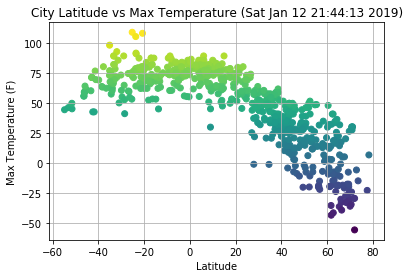

In [7]:
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], c=weather_data['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({time.ctime(weather_data['Date'][0])})")
plt.grid()
plt.savefig("./output_data/max_temp.png")

#### Latitude vs. Humidity Plot

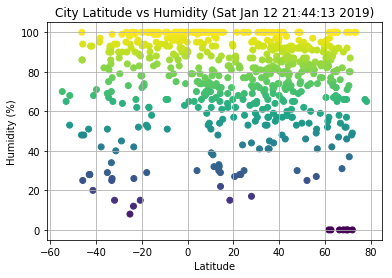

In [8]:
plt.scatter(weather_data['Lat'], weather_data['Humidity'], c=weather_data['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({time.ctime(weather_data['Date'][0])})")
plt.grid()
plt.savefig("./output_data/humidity.png")

#### Latitude vs. Cloudiness Plot

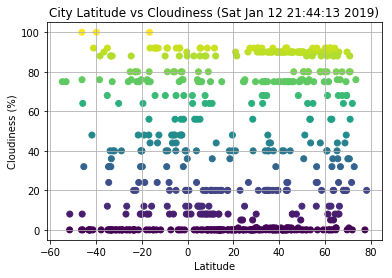

In [9]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], c=weather_data['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({time.ctime(weather_data['Date'][0])})")
plt.grid()
plt.savefig("./output_data/cloudiness.png")

#### Latitude vs. Wind Speed Plot

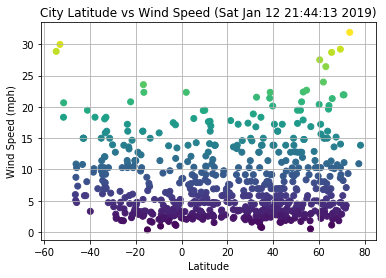

In [10]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], c=weather_data['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({time.ctime(weather_data['Date'][0])})")
plt.grid()
plt.savefig("./output_data/wind_speed.png")